
KNN with 3 Neighbors:
Training Accuracy: 1.00
Testing Accuracy: 1.00

KNN with 5 Neighbors:
Training Accuracy: 1.00
Testing Accuracy: 1.00

KNN with 7 Neighbors:
Training Accuracy: 1.00
Testing Accuracy: 1.00

KNN with 10 Neighbors:
Training Accuracy: 1.00
Testing Accuracy: 1.00

Best K found: 3


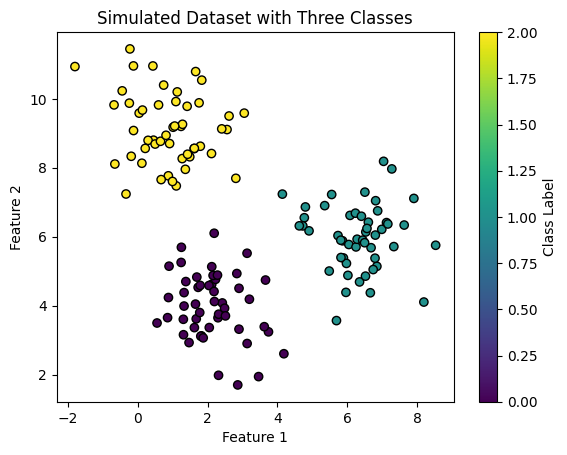

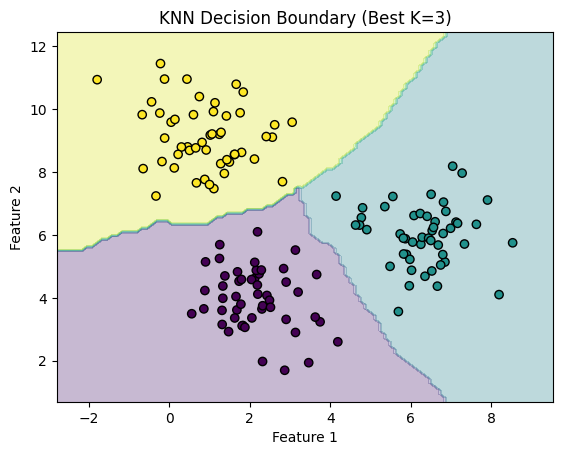

In [25]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# Generate a simulated dataset with three classes
cluster_centers = [[2, 4], [6, 6], [1, 9]]
num_classes = len(cluster_centers)

features, targets = make_blobs(n_samples=150, centers=np.array(cluster_centers), random_state=1)

# Split the data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    features, targets, train_size=0.8, test_size=0.2, random_state=12
)

# Function to train KNN and evaluate accuracy
def evaluate_knn(k_value):
    model = KNeighborsClassifier(n_neighbors=k_value, weights='uniform')
    model.fit(X_train, y_train)

    # Predict on training and test data
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Evaluate accuracy
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)

    print(f"\nKNN with {k_value} Neighbors:")
    print(f"Training Accuracy: {train_acc:.2f}")
    print(f"Testing Accuracy: {test_acc:.2f}")

    return model

# Test with different values of K
knn_models_dict = {}
for k in [3, 5, 7, 10]:  # Trying different values of n_neighbors
    knn_models_dict[k] = evaluate_knn(k_value=k)

# Choose the best K (based on highest test accuracy)
best_k_val = max(knn_models_dict, key=lambda k: accuracy_score(y_test, knn_models_dict[k].predict(X_test)))
print(f"\nBest K found: {best_k_val}")

# Plot the dataset
plt.scatter(features[:, 0], features[:, 1], c=targets, cmap='viridis', edgecolor='k')
plt.title("Simulated Dataset with Three Classes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.colorbar(label="Class Label")
plt.show()

# Plot the decision boundary for the best model
best_knn_model = knn_models_dict[best_k_val]
x_min_val, x_max_val = features[:, 0].min() - 1, features[:, 0].max() + 1
y_min_val, y_max_val = features[:, 1].min() - 1, features[:, 1].max() + 1
grid_xx, grid_yy = np.meshgrid(np.linspace(x_min_val, x_max_val, 100), np.linspace(y_min_val, y_max_val, 100))

Z_val = best_knn_model.predict(np.c_[grid_xx.ravel(), grid_yy.ravel()])
Z_val = Z_val.reshape(grid_xx.shape)

plt.contourf(grid_xx, grid_yy, Z_val, alpha=0.3, cmap='viridis')
plt.scatter(features[:, 0], features[:, 1], c=targets, cmap='viridis', edgecolor='k')
plt.title(f"KNN Decision Boundary (Best K={best_k_val})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
